In [2]:
import yfinance as yf

In [3]:
BHP = yf.Ticker('BHP.AX')
BHP.info

{'address1': '171 Collins Street',
 'address2': 'Level 18',
 'city': 'Melbourne',
 'state': 'VIC',
 'zip': '3000',
 'country': 'Australia',
 'phone': '61 1300 55 47 57',
 'fax': '61 3 9609 3015',
 'website': 'https://www.bhp.com',
 'industry': 'Other Industrial Metals & Mining',
 'industryKey': 'other-industrial-metals-mining',
 'industryDisp': 'Other Industrial Metals & Mining',
 'sector': 'Basic Materials',
 'sectorKey': 'basic-materials',
 'sectorDisp': 'Basic Materials',
 'longBusinessSummary': 'BHP Group Limited operates as a resources company in Australia, Europe, China, Japan, India, South Korea, the rest of Asia, North America, South America, and internationally. The company operates through Copper, Iron Ore, and Coal segments. It engages in the mining of copper, silver, zinc, molybdenum, uranium, gold, iron ore, and metallurgical and energy coal. The company is also involved in mining, smelting, and refining of nickel; and potash development activities. In addition, it provide

In [4]:
hist = BHP.history(period="1y")

In [5]:
hist['Close']

Date
2022-10-06 00:00:00+11:00    38.518925
2022-10-07 00:00:00+11:00    37.857414
2022-10-10 00:00:00+11:00    37.866863
2022-10-11 00:00:00+11:00    37.725109
2022-10-12 00:00:00+11:00    37.366005
                               ...    
2023-10-02 00:00:00+11:00    44.599998
2023-10-03 00:00:00+11:00    43.840000
2023-10-04 00:00:00+11:00    43.720001
2023-10-05 00:00:00+11:00    43.430000
2023-10-06 00:00:00+11:00    43.570000
Name: Close, Length: 254, dtype: float64

In [6]:
import matplotlib.pyplot as plt

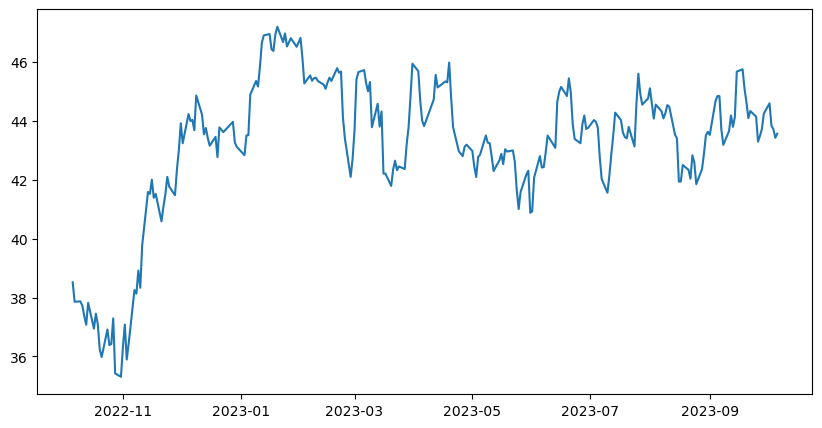

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(hist['Close'].index, hist['Close'])

plt.show()

In [8]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from tqdm import tqdm
from itertools import product
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from numpy.linalg import LinAlgError

import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from scipy.stats import probplot, moment
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [9]:
def plot_correlogram(x, lags=None, title=None):    
    lags = min(10, int(len(x)/5)) if lags is None else lags
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    x.plot(ax=axes[0][0], title='Residuals')
    x.rolling(21).mean().plot(ax=axes[0][0], c='k', lw=1)
    q_p = np.max(q_stat(acf(x, nlags=lags), len(x))[1])
    stats = f'Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(x)[1]:>11.2f}'
    axes[0][0].text(x=.02, y=.85, s=stats, transform=axes[0][0].transAxes)
    probplot(x, plot=axes[0][1])
    mean, var, skew, kurtosis = moment(x, moment=[1, 2, 3, 4])
    s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}'
    axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
    plot_acf(x=x, lags=lags, zero=False, ax=axes[1][0])
    plot_pacf(x, lags=lags, zero=False, ax=axes[1][1])
    axes[1][0].set_xlabel('Lag')
    axes[1][1].set_xlabel('Lag')
    fig.suptitle(title, fontsize=14)
    sns.despine()
    fig.tight_layout()
    fig.subplots_adjust(top=.9)

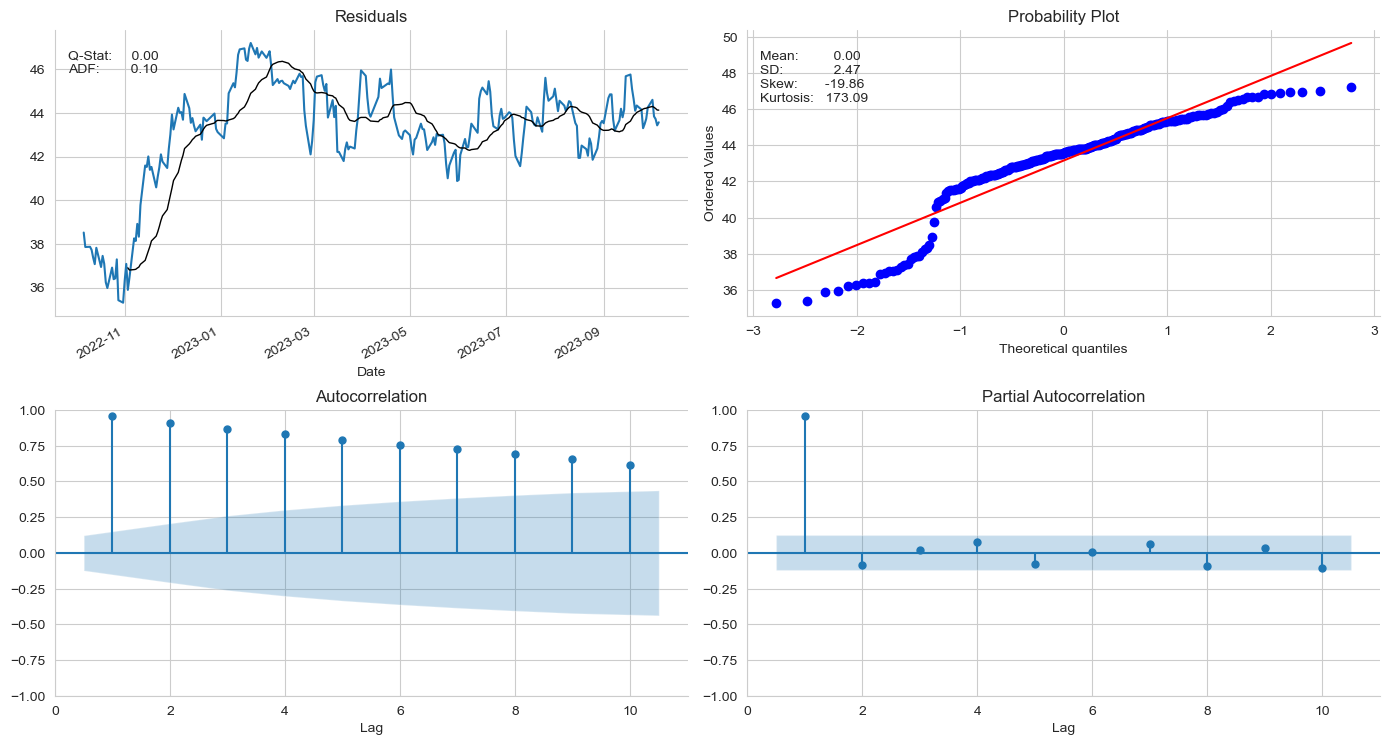

In [10]:
plot_correlogram(hist['Close'])

In [11]:
BHP = hist['Close']
BHP_log = np.log(BHP)
BHP_log_diff = BHP_log.diff()

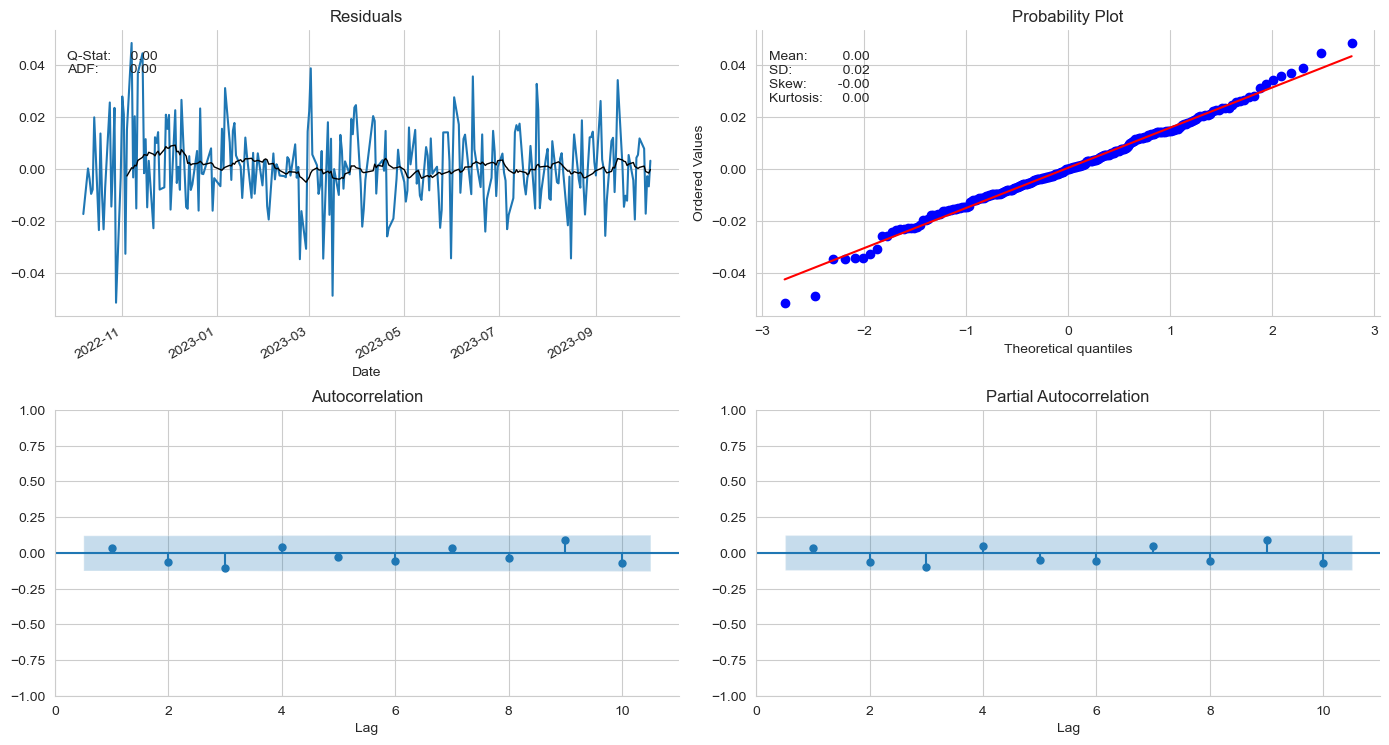

In [13]:
plot_correlogram(BHP_log_diff[1:])